# ENSO example notebook

This notebook contains an example of data access of nextGEMS cycle 3 data with the `Reader` class and evaluation of the NINO3.4 teleconnection (regional mean) with `aqua` libraries and examples of the plotting routines.

In [1]:
import sys
from aqua import Reader
sys.path.insert(0, '../') # Hack to import from parent directory, to be removed
from index import regional_mean_index, regional_mean_anomalies
from plots import simple_plot, cor_plot, index_plot
from tools import load_namelist

FDB5 binary library not present on system, disabling FDB support.


# ENSO with IFS data

In [2]:
diagname  = 'teleconnections'
telecname = 'ENSO'

model = 'IFS'
exp = 'tco1279-orca025-cycle3'
source = '2D_monthly_native'

namelist = load_namelist(diagname)

field = namelist[telecname]['field']

In [3]:
reader = Reader(model=model,exp=exp,source=source,regrid='r100')
data = reader.retrieve()
data

2023-06-12 18:31:07 :: Reader :: WARNING  -> No fixes available for model IFS, experiment tco1279-orca025-cycle3, source 2D_monthly_native


<xarray.Dataset>
Dimensions:  (time: 60, value: 6599680)
Coordinates:
    lat      (value) float64 dask.array<chunksize=(6599680,), meta=np.ndarray>
    lon      (value) float64 dask.array<chunksize=(6599680,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2020-01-15 2020-02-15 ... 2024-12-15
Dimensions without coordinates: value
Data variables: (12/59)
    100u     (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    100v     (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    10u      (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    10v      (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    2d       (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    2t       (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    ...       ...
    tisr     (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    tp       (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    tsr      (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    ttr      (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    z        (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
    zos      (time, value) float64 dask.array<chunksize=(1, 6599680), meta=np.ndarray>
Attributes:
    edition:            1
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

In [4]:
infile = data[field]
infile = reader.regrid(infile)
infile

<xarray.DataArray 'sst' (time: 60, lat: 180, lon: 360)>
dask.array<reshape, shape=(60, 180, 360), dtype=float64, chunksize=(1, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-15 2020-02-15 ... 2024-12-15
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes: (12/17)
    paramId:                    34
    dataType:                   fc
    numberOfPoints:             6599680
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   avg
    ...                         ...
    missingValue:               3.4028234663852886e+38
    totalNumber:                0
    NV:                         0
    gridDefinitionDescription:  Gaussian Latitude/Longitude Grid
    regridded:                  1
    history:                    2023-06-12 18:31:38 regridded by AQUA regridd...

## Teleconnection evaluation

The NINO3.4 can be evaluated by using the library function `regional_mean_index` from the `index.py` file.

The teleconnection can be evaluated with a custom rolling window to average data (standard is 3 months, here written explicitely for sake of clarity).

The function returns a `DataArray` with the timeserie of values.

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'ENSO Index, Nino 3.4'}, xlabel='time', ylabel='sst [K]'>)

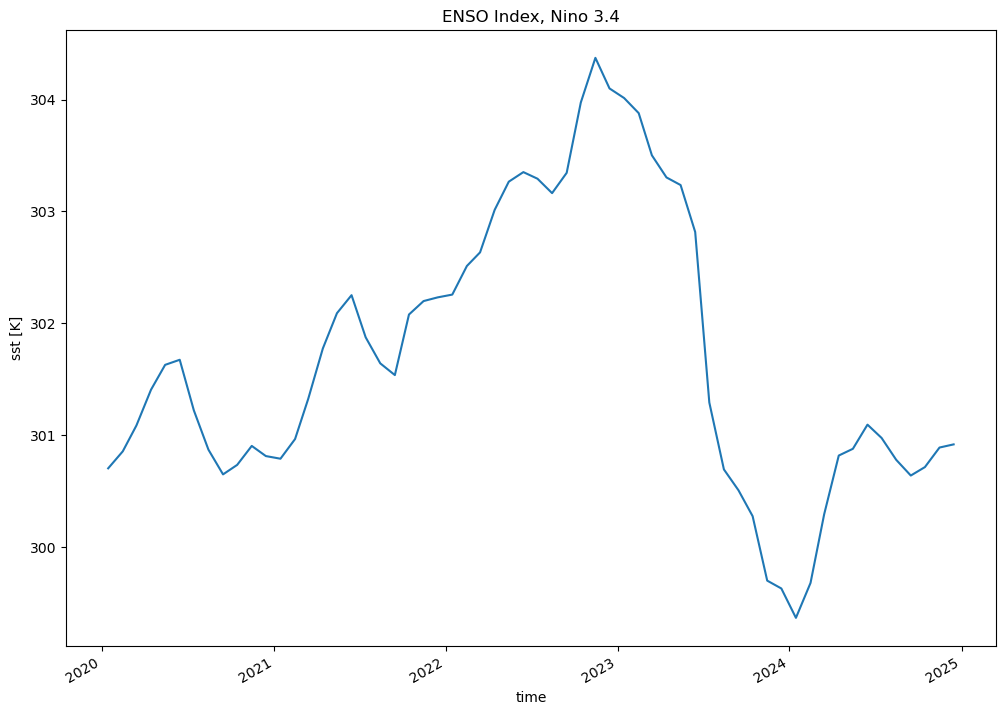

In [5]:
enso = regional_mean_index(infile,namelist,telecname,months_window=1)
simple_plot(enso,title='ENSO Index, Nino 3.4')

## Correlation plot

To visualize the teleconnection on a 2D plot functions in the `plots.py` are introduced.
There is an option `plot=True` that creates a plot of the correlation. Additionally an xarray containing the result of the regression is returned, if needed for further analysis or storage.
A custom projection can be specified.

/work/bb1153/b382289/mambaforge/envs/teleconnections/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


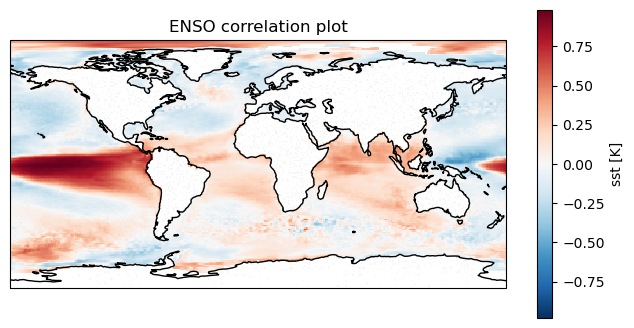

In [6]:
enso_cor = cor_plot(enso,infile,title='ENSO correlation plot',save=False)

## ENSO Nino3.4 anomalies

Another library function is introduced, able to evaluate anomalies of a regional mean index. The function `regional_mean_anomalies` returns a `DataArray` with the anomalies.

Also for this function, an optional parameter `months_window` can be specified to average the data before computing the anomalies.

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'ENSO Anomalies, Nino 3.4'}, xlabel='time', ylabel='sst [K]'>)

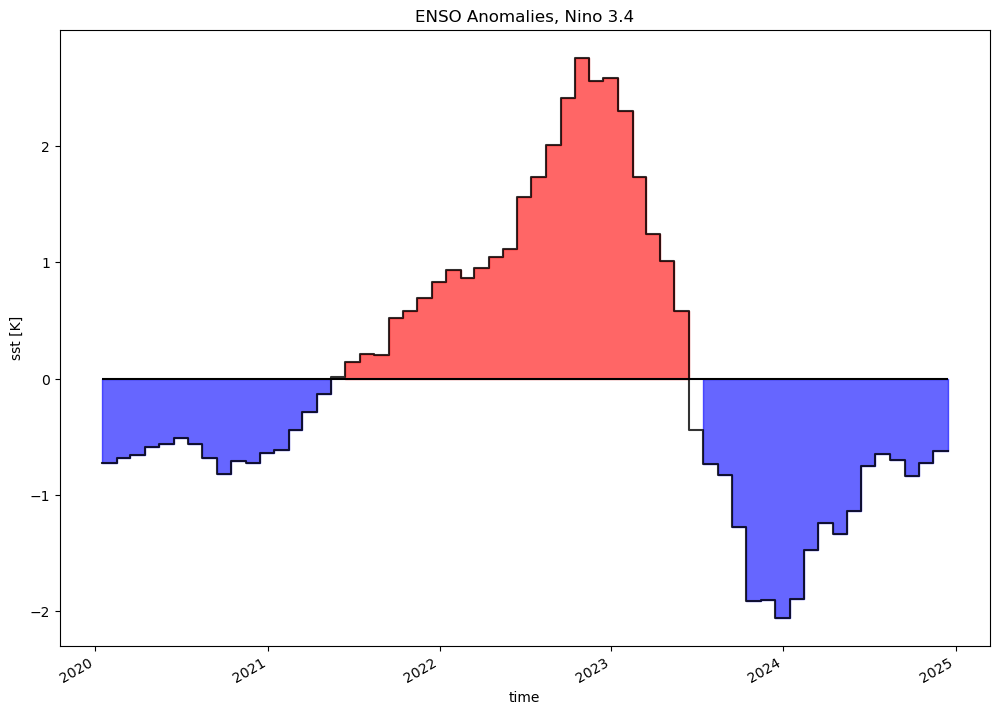

In [7]:
enso_an = regional_mean_anomalies(infile,namelist,telecname,months_window=1)
index_plot(enso_an,title='ENSO Anomalies, Nino 3.4')

# ICON data

In [17]:
model = 'ICON'
exp = 'ngc3028'
source = 'P1D'

reader = Reader(model=model, exp=exp, source=source, zoom=8, regrid='r025', freq='monthly')

data = reader.retrieve()
data
infile = data[field]
infile = reader.timmean(infile)
infile = reader.regrid(infile)
infile

<xarray.DataArray 'sst' (time: 67, lat: 720, lon: 1440)>
dask.array<reshape, shape=(67, 720, 1440), dtype=float64, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-21 2020-02-01 ... 2025-07-01
  * lat      (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
Attributes:
    cell_methods:   time: mean cell: mean
    component:      atmo
    grid_mapping:   crs
    long_name:      surface temperature
    standard_name:  surface_temperature
    units:          K
    vgrid:          surface
    history:        2023-06-12 18:41:15 variable renamed by AQUA fixer;\n2023...
    regridded:      1

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'ENSO Index, Nino 3.4'}, xlabel='time', ylabel='surface temperature [K]'>)

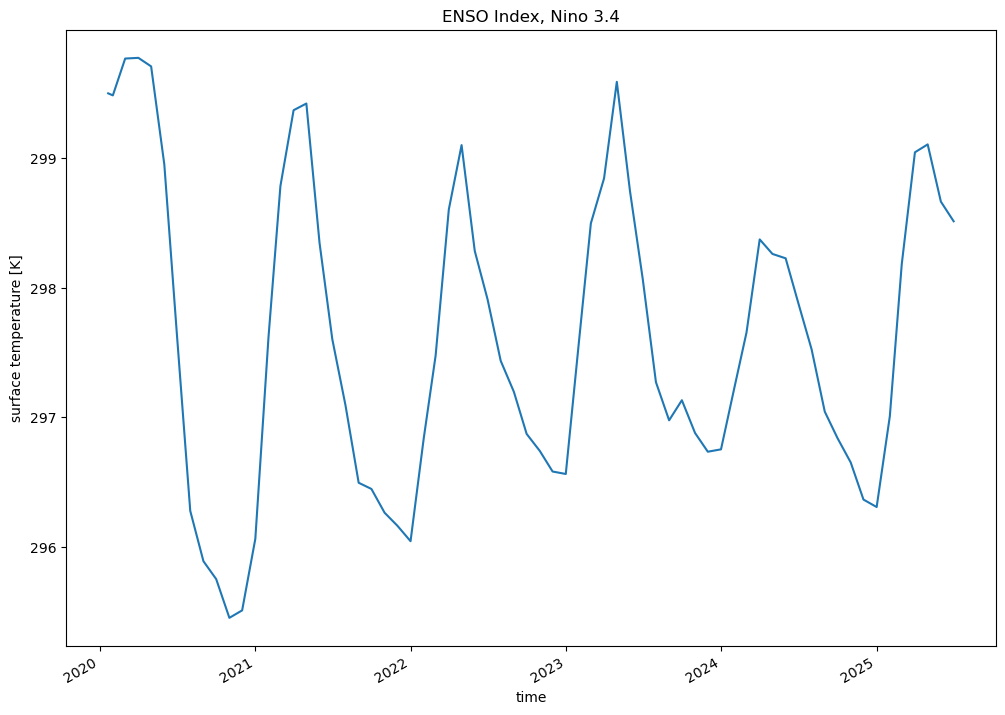

In [18]:
enso_ICON = regional_mean_index(infile,namelist,telecname,months_window=1)
simple_plot(enso_ICON,title='ENSO Index, Nino 3.4')

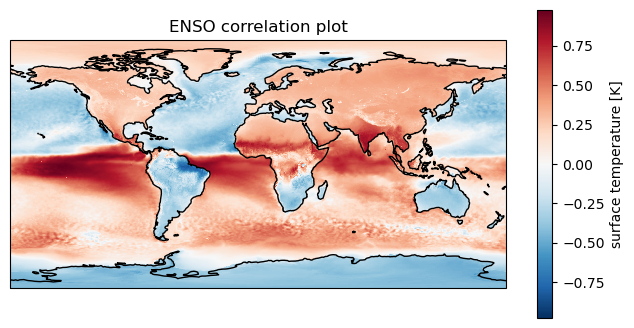

In [19]:
enso_cor = cor_plot(enso_ICON,infile,title='ENSO correlation plot',save=False)